In [1]:
# Importing necessary libraries for data analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading the 'seeds.csv' dataset into a Pandas DataFrame.
seeds_data = pd.read_csv('seeds.csv')
seeds_data



,V1,V2,V3,V4,V5,V6,V7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
# Loading the 'Vowel.csv' dataset into a Pandas DataFrame.
vowels_data = pd.read_csv('Vowel.csv')
vowels_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,0,-3.639,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,hid
1,0,-3.327,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,hId
2,0,-2.120,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,hEd
3,0,-2.287,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,hAd
4,0,-2.598,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,hYd
...,...,...,...,...,...,...,...,...,...,...,...
985,14,-3.239,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,hOd
986,14,-3.753,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,hod
987,14,-3.980,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,hUd
988,14,-4.264,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,hud


In [3]:
# Extracting features from the 'seeds_data' DataFrame.
# Selecting columns from index 0 to 6 (inclusive) using iloc.
seeds_features = seeds_data.iloc[:, 0:7]

# Extracting the target variable from the 'seeds_data' DataFrame.
# Selecting the last column using iloc.
seeds_target = seeds_data.iloc[:, -1]

# Converting the 'seeds_features' DataFrame to a NumPy array for further processing.
seeds_features_numpy = seeds_features.to_numpy()
seeds_features_numpy



array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [4]:
# Extracting features from the 'vowels_data' DataFrame.
# Selecting all columns except the last one using iloc.
vowel_features = vowels_data.iloc[:, :-1]

# Extracting the target variable from the 'vowels_data' DataFrame.
# Selecting the last column using iloc.
vowel_target = vowels_data.iloc[:, -1]

# Converting the 'vowel_features' DataFrame to a NumPy array for further processing.
vowel_features_numpy = vowel_features.to_numpy()
vowel_features_numpy

array([[ 0.   , -3.639, -0.67 , ...,  0.529, -0.874, -0.814],
       [ 0.   , -3.327, -0.694, ...,  0.51 , -0.621, -0.488],
       [ 0.   , -2.12 , -1.576, ...,  0.676, -0.809, -0.049],
       ...,
       [14.   , -3.98 ,  0.068, ...,  0.521, -0.773, -0.5  ],
       [14.   , -4.264,  0.065, ..., -0.14 , -0.863, -0.39 ],
       [14.   , -3.291, -0.679, ...,  0.115, -1.046,  0.697]])

# 1. K-Means and GMM-EM

K-Means Clustering

In [5]:
import random

def euclidean(point, data):
    # Calculate Euclidean distance between a point and a set of data points
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        # Initialize KMeans with the specified number of clusters and maximum iterations
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Randomly select initial centroid start points, uniformly distributed across the domain of the dataset
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [random.uniform(min_, max_) for _ in range(self.n_clusters)]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        indices = []

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            indices = []
            # Sort each datapoint, assigning to the nearest centroid
            sorted_points = [[] for i in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
                indices.append(centroid_idx)

            # Update centroids as the mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

            # Handle any NaN values resulting from a centroid having no points
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]

            iteration += 1
        return indices

    def evaluate(self, X):
        # Assign each data point to the nearest centroid and return centroids and indices
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx


GMM - EM

In [6]:
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        # Initialize model parameters
        self.shape = X.shape
        self.n, self.m = self.shape
        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)

        # Randomly initialize mu and sigma
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [X[row_index, :] for row_index in random_row]
        self.sigma = [np.cov(X.T) for _ in range(self.k)]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)

    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

    def fit(self, X):
        # Fit the GMM to the data
        self.initialize(X)
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)

    def predict_proba(self, X):
        # Predict the probability of each sample belonging to each cluster
        likelihood = np.zeros((self.n, self.k))
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i], cov=self.sigma[i])
            likelihood[:, i] = distribution.pdf(X)

        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights

    def predict(self, X):
        # Predict the cluster assignment for each sample
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)


# 2. Silhouette Coefficient

In [7]:
# Import necessary libraries and modules
import functools
import numpy as np
from sklearn.utils import check_random_state, check_X_y, _safe_indexing
from sklearn.metrics import pairwise_distances_chunked, pairwise_distances
from sklearn.preprocessing import LabelEncoder

# Define silhouette_score function
def silhouette_score(X, labels, *, metric="euclidean", sample_size=None, random_state=None, **kwds):
    # Check for sampling
    if sample_size is not None:
        X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        if metric == "precomputed":
            X, labels = X[indices].T[indices].T, labels[indices]
        else:
            X, labels = X[indices], labels[indices]
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))

# Define _silhouette_reduce function
def _silhouette_reduce(D_chunk, start, labels, label_freqs):
    # Accumulate distances from each sample to each cluster
    clust_dists = np.zeros((len(D_chunk), len(label_freqs)), dtype=D_chunk.dtype)
    for i in range(len(D_chunk)):
        clust_dists[i] += np.bincount(labels, weights=D_chunk[i], minlength=len(label_freqs))

    # Intra_index selects intra-cluster distances within clust_dists
    intra_index = (np.arange(len(D_chunk)), labels[start : start + len(D_chunk)])
    # Intra_clust_dists are averaged over cluster size outside this function
    intra_clust_dists = clust_dists[intra_index]
    # Of the remaining distances, we normalize and extract the minimum
    clust_dists[intra_index] = np.inf
    clust_dists /= label_freqs
    inter_clust_dists = clust_dists.min(axis=1)
    return intra_clust_dists, inter_clust_dists

# Check the number of labels
def check_number_of_labels(n_labels, n_samples):
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 to n_samples - 1 (inclusive)" % n_labels)

# Define silhouette_samples function
def silhouette_samples(X, labels, *, metric="euclidean", **kwds):
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])

    # Check for non-zero diagonal entries in precomputed distance matrix
    if metric == "precomputed":
        error_msg = ValueError("The precomputed distance matrix contains non-zero elements on the diagonal. Use np.fill_diagonal(X, 0).")
        if X.dtype.kind == "f":
            atol = np.finfo(X.dtype).eps * 100
            if np.any(np.abs(np.diagonal(X)) > atol):
                raise ValueError(error_msg)
        elif np.any(np.diagonal(X) != 0):  # Integral dtype
            raise ValueError(error_msg)

    # Label encoding
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples = len(labels)
    label_freqs = np.bincount(labels)
    check_number_of_labels(len(le.classes_), n_samples)

    kwds["metric"] = metric
    reduce_func = functools.partial(_silhouette_reduce, labels=labels, label_freqs=label_freqs)
    results = zip(*pairwise_distances_chunked(X, reduce_func=reduce_func, **kwds))
    intra_clust_dists, inter_clust_dists = results
    intra_clust_dists = np.concatenate(intra_clust_dists)
    inter_clust_dists = np.concatenate(inter_clust_dists)

    denom = (label_freqs - 1).take(labels, mode="clip")
    with np.errstate(divide="ignore", invalid="ignore"):
        intra_clust_dists /= denom

    sil_samples = inter_clust_dists - intra_clust_dists
    with np.errstate(divide="ignore", invalid="ignore"):
        sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)
    # Nan values are for clusters of size 1, and should be 0
    return np.nan_to_num(sil_samples)


# 2. Rand Index

In [8]:
from scipy.special import comb

def rand_index(actual, pred):
    # Calculate the Rand Index
    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'vowel_classes' is your list of 11 classes
vowel_classes = ['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd', 'hud', 'hed']

# Create a label encoder and fit-transform the classes to numeric labels
label_encoder_vowel = LabelEncoder()
numeric_labels_vowel = label_encoder_vowel.fit_transform(vowel_classes)

# Now, transform your original vowel_target to numeric labels
numeric_vowel_target = label_encoder_vowel.transform(vowel_target)


# 2. NMI


In [10]:
import numpy as np

def mutual_information(X, Y):
    # Calculate the mutual information between two sets of labels X and Y
    n = len(X)
    unique_X, counts_X = np.unique(X, return_counts=True)
    unique_Y, counts_Y = np.unique(Y, return_counts=True)

    prob_X = counts_X / n
    prob_Y = counts_Y / n

    prob_XY = np.zeros((len(unique_X), len(unique_Y)))
    for i, x in enumerate(unique_X):
        for j, y in enumerate(unique_Y):
            prob_XY[i, j] = np.sum((X == x) & (Y == y)) / n

    mi = 0.0
    for i, x in enumerate(unique_X):
        for j, y in enumerate(unique_Y):
            if prob_XY[i, j] > 0.0:
                mi += prob_XY[i, j] * np.log(prob_XY[i, j] / (prob_X[i] * prob_Y[j]))

    return mi

def entropy(labels):
    # Calculate the entropy of a set of labels
    n = len(labels)
    unique_labels, counts = np.unique(labels, return_counts=True)

    prob = counts / n
    entropy = -np.sum(prob * np.log(prob))

    return entropy

def normalized_mutual_information(X, Y):
    # Calculate the normalized mutual information between two sets of labels X and Y
    mi = mutual_information(X, Y)
    h_X = entropy(X)
    h_Y = entropy(Y)

    nmi = mi / np.sqrt(h_X * h_Y) if h_X * h_Y > 0 else 0.0

    return nmi


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


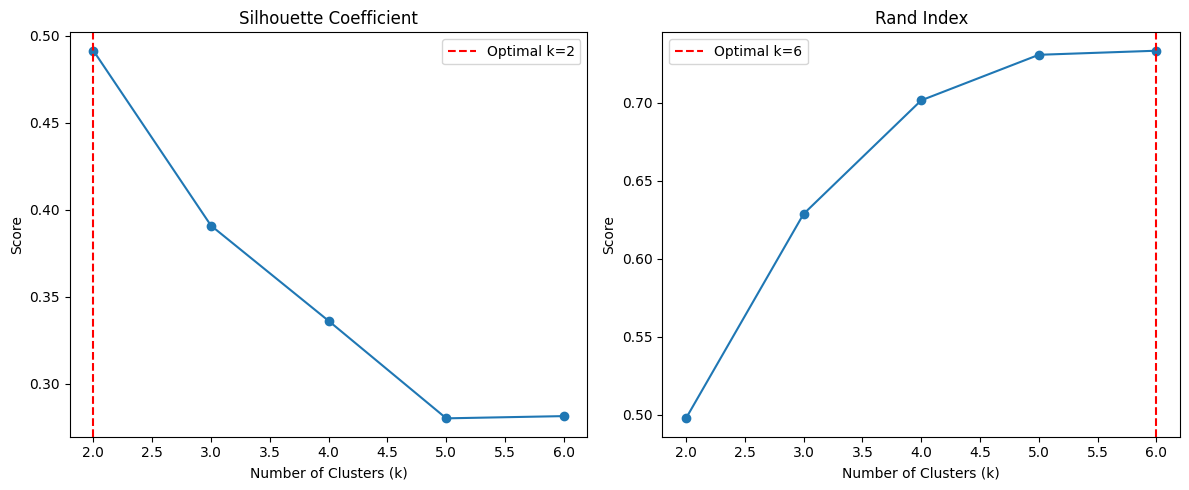

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NMI for Silhouette Coefficient (k=2): 0.0
NMI for Rand Index (k=6): 0.043266272823479314


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Load the 'Vowel.csv' dataset into a Pandas DataFrame.
vowels_data = pd.read_csv('Vowel.csv')

# Extracting features from the 'vowels_data' DataFrame.
# Selecting all columns except the last one using iloc.
vowel_features = vowels_data.iloc[:, :-1]

# Extracting the target variable from the 'vowels_data' DataFrame.
# Selecting the last column using iloc.
vowel_target = vowels_data.iloc[:, -1]

# Converting the 'vowel_features' DataFrame to a NumPy array for further processing.
vowel_features_numpy = vowel_features.to_numpy()

# Set random seed
np.random.seed(42)

# Initialize the range of k values
k_values = range(2, 7)  # Adjust the range as needed

# Initialize lists to store metrics for custom K-Means
silhouette_scores_custom = []
rand_indices_custom = []

# Perform clustering and evaluation for each k
for k in k_values:
    # Fit custom K-Means
    kmeans_custom = KMeans(n_clusters=k)
    labels_custom = kmeans_custom.fit(vowel_features_numpy)

    # Calculate Silhouette Coefficient
    silhouette = silhouette_score(vowel_features_numpy, labels_custom)
    silhouette_scores_custom.append(silhouette)

    # Calculate Rand Index
    rand_index_custom = rand_index(numeric_vowel_target, labels_custom)
    rand_indices_custom.append(rand_index_custom)

# Find the optimal k based on Silhouette Coefficient
optimal_k_silhouette = k_values[np.argmax(silhouette_scores_custom)]

# Find the optimal k based on Rand Index
optimal_k_rand = k_values[np.argmax(rand_indices_custom)]

# Plot Silhouette Coefficient
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_custom, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal k={optimal_k_silhouette}')
plt.legend()

# Plot Rand Index
plt.subplot(1, 2, 2)
plt.plot(k_values, rand_indices_custom, marker='o')
plt.title('Rand Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.axvline(x=optimal_k_rand, color='r', linestyle='--', label=f'Optimal k={optimal_k_rand}')
plt.legend()

plt.tight_layout()
plt.show()

# Output the NMI for the selected k values
nmi_silhouette = normalized_mutual_information(vowel_target, KMeans(n_clusters=optimal_k_silhouette).fit(vowel_features_numpy))
nmi_rand = normalized_mutual_information(vowel_target, KMeans(n_clusters=optimal_k_rand).fit(vowel_features_numpy))

print(f"NMI for Silhouette Coefficient (k={optimal_k_silhouette}): {nmi_silhouette}")
print(f"NMI for Rand Index (k={optimal_k_rand}): {nmi_rand}")

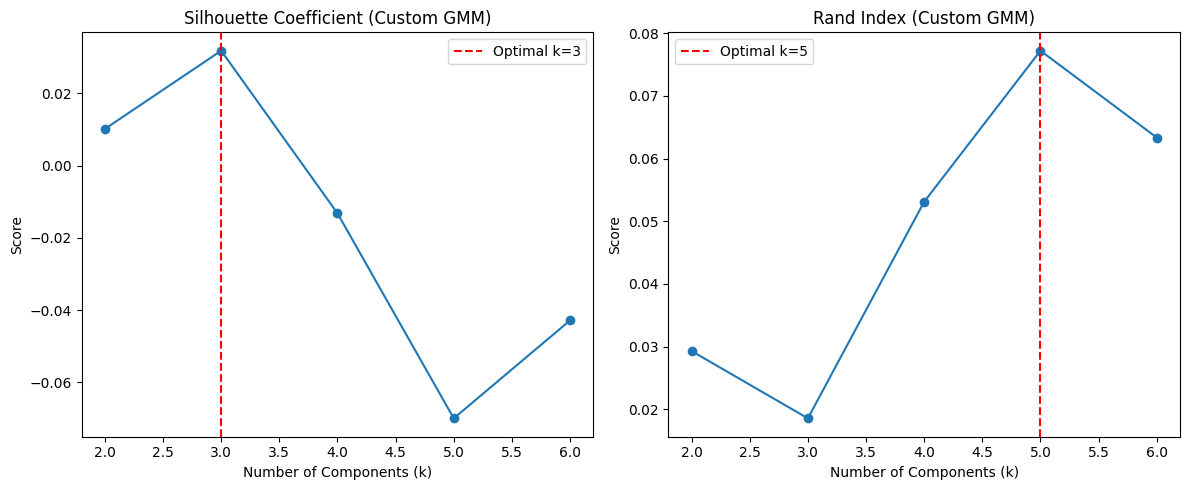

NMI for Silhouette Coefficient (k=3): 0.16875995331836405
NMI for Rand Index (k=5): 0.16875995331836405


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the 'Vowel.csv' dataset into a Pandas DataFrame.
vowels_data = pd.read_csv('Vowel.csv')

# Extracting features from the 'vowels_data' DataFrame.
# Selecting all columns except the last one using iloc.
vowel_features = vowels_data.iloc[:, :-1]

# Extracting the target variable from the 'vowels_data' DataFrame.
# Selecting the last column using iloc.
vowel_target = vowels_data.iloc[:, -1]

# Converting the 'vowel_features' DataFrame to a NumPy array for further processing.
vowel_features_numpy = vowel_features.to_numpy()

# Set random seed
np.random.seed(42)

# Initialize the range of k values
k_values = range(2, 7)  # Adjust the range as needed

# Initialize lists to store metrics for GMM
silhouette_scores_gmm = []
rand_indices_gmm = []

# Perform clustering and evaluation for each k using custom GMM
for k in k_values:
    # Fit custom GMM
    gmm_custom = GMM(k)
    gmm_custom.fit(vowel_features_numpy)
    labels_custom = gmm_custom.predict(vowel_features_numpy)

    # Calculate Silhouette Coefficient
    silhouette_gmm_custom = silhouette_score(vowel_features_numpy, labels_custom)
    silhouette_scores_gmm.append(silhouette_gmm_custom)

    # Calculate Rand Index
    rand_index_gmm_custom = adjusted_rand_score(numeric_vowel_target, labels_custom)
    rand_indices_gmm.append(rand_index_gmm_custom)

# Find the optimal k based on Silhouette Coefficient for custom GMM
optimal_k_silhouette_gmm_custom = k_values[np.argmax(silhouette_scores_gmm)]

# Find the optimal k based on Rand Index for custom GMM
optimal_k_rand_gmm_custom = k_values[np.argmax(rand_indices_gmm)]

# Plot Silhouette Coefficient for custom GMM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_gmm, marker='o')
plt.title('Silhouette Coefficient (Custom GMM)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.axvline(x=optimal_k_silhouette_gmm_custom, color='r', linestyle='--', label=f'Optimal k={optimal_k_silhouette_gmm_custom}')
plt.legend()

# Plot Rand Index for custom GMM
plt.subplot(1, 2, 2)
plt.plot(k_values, rand_indices_gmm, marker='o')
plt.title('Rand Index (Custom GMM)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.axvline(x=optimal_k_rand_gmm_custom, color='r', linestyle='--', label=f'Optimal k={optimal_k_rand_gmm_custom}')
plt.legend()

plt.tight_layout()
plt.show()

# Output the NMI for the selected k values
nmi_silhouette_custom = normalized_mutual_information(numeric_vowel_target, labels_custom)
nmi_rand_custom = normalized_mutual_information(numeric_vowel_target, labels_custom)

print(f"NMI for Silhouette Coefficient (k={optimal_k_silhouette_gmm_custom}): {nmi_silhouette_custom}")
print(f"NMI for Rand Index (k={optimal_k_rand_gmm_custom}): {nmi_rand_custom}")